<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.4.1 Singular Value Decomposition**
**Singular Value Decomposition** (SVD) is a technique used in linear algebra to decompose a matrix into three simpler matrices. Given that *A* is a *m x n* matrix with the dimension of col(A)=*r*, then it can be represented as 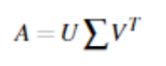


Where:


*   *U* is an *m x n* orthogonal matrix
*   *Σ* is an *m x n* diagonal matrix
*   *V^T* is the tranpose of an *n x n* orthogonal matrix


Visually, the SVD of A looks like this:
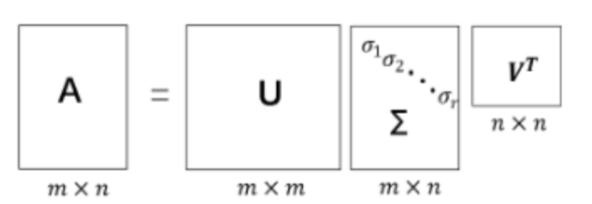

We can demonstrate SVD in the program below:

In [5]:
import numpy as np
from numpy.linalg import svd


A = np.array([[12, 4, 13],
              [23, 9, 27],
              [2, 1, 19],
              [10, 17, 11]])

# Singular Value Decomposition
U, S, VT = svd(A)


print("Matrix U (Left singular vectors):\n ", U)
print("\nSingular values (Diagonal of S):\n ", S)
print("\nMatrix V^T (Right singular vectors):\n ", VT)


Matrix U (Left singular vectors):
  [[-0.37547623 -0.05301725  0.30474626 -0.8736913 ]
 [-0.76198442 -0.10300299  0.42149723  0.48073923]
 [-0.33283979 -0.63936851 -0.6906077  -0.05904732]
 [-0.40940813  0.76012332 -0.50252443 -0.04546121]]

Singular values (Diagonal of S):
  [47.74060373 13.70575834  8.77422043]

Matrix V^T (Right singular vectors):
  [[-0.56118095 -0.32786646 -0.75998653]
 [ 0.24203116  0.81306206 -0.52948182]
 [ 0.79151555 -0.48107554 -0.37692104]]


SVD has many applications, including:


*   Calculation of pseudo-inverse
*   Solving a set of homogenous linear equations
*   Determining the rank, range and null space of a matrix
*   Digital signal processing
*   Image processing

The below program demonstrates how SVD can be used to solve a linear system *Ax=b* where *x* is our vector of unknowns.


In [15]:
import numpy as np
from numpy.linalg import svd
from numpy import dot
from numpy import diag
from numpy.linalg import lstsq

A = np.array([[11, 3], [13, 14], [4, 6]])
b = np.array([7, 8, 9])


U, S, VT = svd(A, full_matrices=False)
UT_b = dot(U.T, b)

# Solve for y (y = S^-1 * U^T * b)
S_inv = diag(1 / S)
y = dot(S_inv, UT_b[:len(S)])

# Compute x (x = V^T.T * y)
x_svd = dot(VT.T, y)
# Compare with the least-squares solution
x_ls = lstsq(A, b, rcond=None)[0]


print("Solution using SVD: ", x_svd)
print("Solution using least squares: ", x_ls)


Solution using SVD:  [0.45738346 0.32234586]
Solution using least squares:  [0.45738346 0.32234586]


# **1.4.2 Low-Rank Matrix Approximations**
**Low-rank matrix approximation** refers to the process of approximating a given matrix with another matrix that has a lower rank, thus allowing us to reduce the complexity of the data while still retaining the most important information. This is useful in situations where data compression, noise reduction and improving computational efficiency are needed.

Because SVD represents a matrix A as a sum of rank-1 matrices, we can determine a rank-*k* matrix by only keeping the top *k* singular values. Thus, the proposed rank-*k* approximation is:
 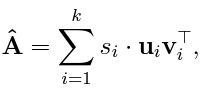



In [13]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from numpy import diag
from numpy import dot

#Sample Matrix
A = np.array([[11, 6, 3],
              [21, 15, 4],
              [17, 8, 19],
              [10, 22, 12]])

# SVD on matrix
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Function to perform low-rank approximation
def low_rank_approximation(U, S, VT, k):
    U_k = U[:, :k]
    S_k = diag(S[:k])
    VT_k = VT[:k, :]
    return dot(U_k, dot(S_k, VT_k))

# Low-rank approximations for different k values
k_values = [1, 2]  # Ranks 1 and 2 approximations
approximations = [low_rank_approximation(U, S, VT, k) for k in k_values]

print("Original matrix A:\n", A)

for i, k in enumerate(k_values):
    print(f"\nRank {k} approximation of A:\n", approximations[i])



Original matrix A:
 [[11  6  3]
 [21 15  4]
 [17  8 19]
 [10 22 12]]

Rank 1 approximation of A:
 [[ 8.08791747  7.30261701  5.53610828]
 [16.32459417 14.73954939 11.17404095]
 [16.30140285 14.71860984 11.15816669]
 [16.67325574 15.05435749 11.41269672]]

Rank 2 approximation of A:
 [[ 8.04230524  7.93409293  4.76977233]
 [16.07306606 18.22181593  6.94809033]
 [16.77612121  8.1463986  19.13396057]
 [16.47751874 17.76422714  8.12409855]]


# **1.4.3 Principal Component Analysis**
**Principal Component Analysis (PCA)** is a dimensionality reduction technique, where high-dimensional data is transformed into a lower-dimensional form while preserving as much information as possible.
**Principal components** are new variables that are constructed as linear combinations or mixtures of the initial variables.

To prepare for PCA, we can determine the **covariance matrix** of the data. **Covariance** is a measure of how much two variables change together. A positive covariance indicated that as one variable increases, the other increases as well. A negative covariance indicates that as one variable increases, the other decreases. This is represented by the form: 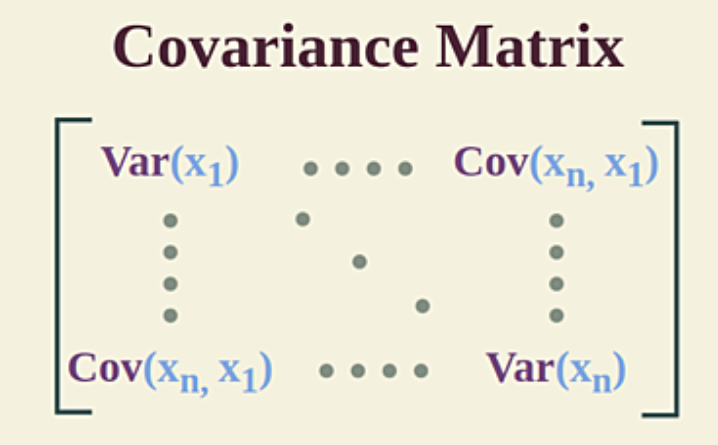

In the example below, we look at the amount of variance each component explains and how they contribute to cumulative variance. We will generate synthetic data that is composed of 100 samples and 10 features.

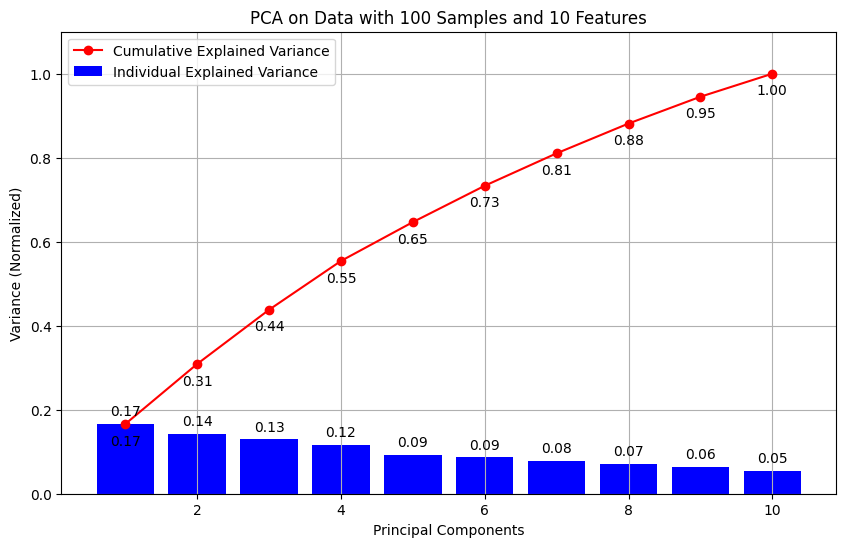

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


np.random.seed(0)
X = np.random.rand(100, 10)  # 100 samples, 10 features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# individual explained variance for each principal component
explained_variance = pca.explained_variance_

# normalization
normalized_explained_variance = explained_variance / np.sum(explained_variance)
cumulative_explained_variance = np.cumsum(normalized_explained_variance)


plt.figure(figsize=(10, 6))

# plot individual explained variance
plt.bar(range(1, len(normalized_explained_variance) + 1), normalized_explained_variance, label='Individual Explained Variance', color='blue')

# plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', label='Cumulative Explained Variance', color='red')

# data labels
for i, v in enumerate(normalized_explained_variance):
    plt.text(i + 1, v + 0.02, f'{v:.2f}', ha='center')
for i, v in enumerate(cumulative_explained_variance):
    plt.text(i + 1, v - 0.05, f'{v:.2f}', ha='center')


plt.ylim(0, 1.1)
plt.xlabel('Principal Components')
plt.ylabel('Variance (Normalized)')
plt.title('PCA on Data with 100 Samples and 10 Features')
plt.legend()
plt.grid(True)
plt.show()


Here, we can see that each individual component explains less and less variance. Thus, we could reduce the dimensionality of this data that originally had 10 components to 8 componenets, and the data would still retain 88% of its original variance.

**Applications of PCA include**:
*   **Finance and Economics**: PCA can help analyze market trends by reducing the dimensionality of large financial datasets.
*  **Bioinformatics**: Principal components can explain the variation of gene expressions.
*  **Medical Imaging**: PCA can be used to analyze MRI data by reducing the dimensionality of large imaging datasets.




